
# Q5: V-Plot

A **V-plot** is a two-dimensional heatmap that displays the distribution of DNA fragment lengths ($Y$) as a function of their midpoint offset ($X$) from a genomic reference point (e.g.\ a transcription factor binding site or nucleosome center).  It gets its name from the characteristic “V” shape formed by protected fragments:

1. **Definition of axes**  
   - Let the **reference locus** have interval endpoints $(s_1, e_1)$ and each **sequenced fragment** have endpoints $(s_2, e_2)$.  
   - The **midpoint offset**  
     $$C_1 \;=\;\frac{s_1 + e_1}{2},\qquad C_2 \;=\;\frac{s_2 + e_2}{2},\qquad X = C_2 - C_1.$$
   - The **fragment length**  
     $$Y = e_2 - s_2.$$
   - At each pair $(X,Y)$, we count the number of fragments $Z(X,Y)$ and color‐code this count.

2. **Characteristic “V” shape**  
   - At $X\approx 0$, many **short fragments** appear because nuclease cuts immediately adjacent to the bound protein, producing a spike of low–$Y$ fragments.  
   - As the fragment midpoint moves away from the protein ($|X|$ increases), the **minimum possible fragment length** grows linearly, since fragments must span the protected region, tracing out two diagonal arms.

3. **Why V-plots?**  
   - They **combine positional and size information** in one view, revealing how protection footprints shape fragment distributions.  
   - They make it easy to **estimate footprint width** (the V‐vertex width) and **assess cleavage biases** (symmetry of arms).  
   - They can distinguish **different classes of DNA–protein interactions**:  
     - **Sharp, narrow V** for small transcription factors.  
     - **Wide V** for larger complexes (nucleosomes, multi-subunit assemblies).  
   - They facilitate **comparisons** across conditions (e.g.\ treatment vs. control) by visualizing changes in footprint strength or occupancy.

---

# Applications of V-Plots in Genomics

1. **Transcription Factor Footprinting**  
   - Identify the precise boundaries of protein binding sites by locating the V-vertex and measuring its width.

2. **Nucleosome Positioning**  
   - Detect nucleosome centers: well‐positioned nucleosomes produce V-plots with broad, symmetric arms reflecting ~147 bp protected fragments.

3. **Chromatin Accessibility Assays**  
   - In ATAC-seq or DNase-seq data, V-plots reveal how chromatin remodelers alter accessibility, visible as changes in the V-shape intensity or symmetry.

4. **Comparative Analysis**  
   - By generating V-plots for different cell types or conditions, one can quantify shifts in footprint strength, binding site occupancy, or fragmentation patterns.

5. **Quality Control**  
   - A crisp, symmetric V indicates high‐quality footprinting data; a noisy or asymmetric V can flag technical artifacts or sample degradation.

> **In summary:** V-plots provide an intuitive, high–information‐density visualization of how DNA is protected or cleaved around genomic features, making them invaluable in studies of DNA–protein interactions and chromatin structure.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

## 1) Counting Fragments for Each (X, Y) Pair
- Open the `mapped.bed` file and read each line.
- For each fragment:
  - Compute center of the **reference site**:
  - Compute center of the **fragment**:
  - Calculate the **offset**:
  - Calculate the **fragment size**:
  - Increment the count of $(X, Y)$ in a dictionary `count_dict`.



## 2) Preparing the Axes
- Extract all **unique X and Y values** from `count_dict`.
- Sort them to maintain axis order.
- Create mapping dictionaries `xi` and `yi` to map each X and Y to its corresponding matrix index.



## 3) Building the Heatmap Matrix
- Create a 2D NumPy array `heatmap` of shape `(len(y_unique), len(x_unique))`.
- For every $(X, Y)$ pair in `count_dict`, place the count value into the corresponding matrix cell:
  $$ \text{heatmap}[\,\text{yi}[Y],\,\text{xi}[X]\,] = Z $$



## 4) Plotting the V-Plot
- Use `plt.imshow` to display the `heatmap`:
  - Set `aspect='auto'` to adjust stretching.
  - Use `origin='lower'` so that low Y-values are at the bottom.
  - Map matrix coordinates back to real X and Y units using `extent`.
  - Color intensity corresponds to fragment count ($Z$).
- Label axes and add a colorbar to represent fragment density.



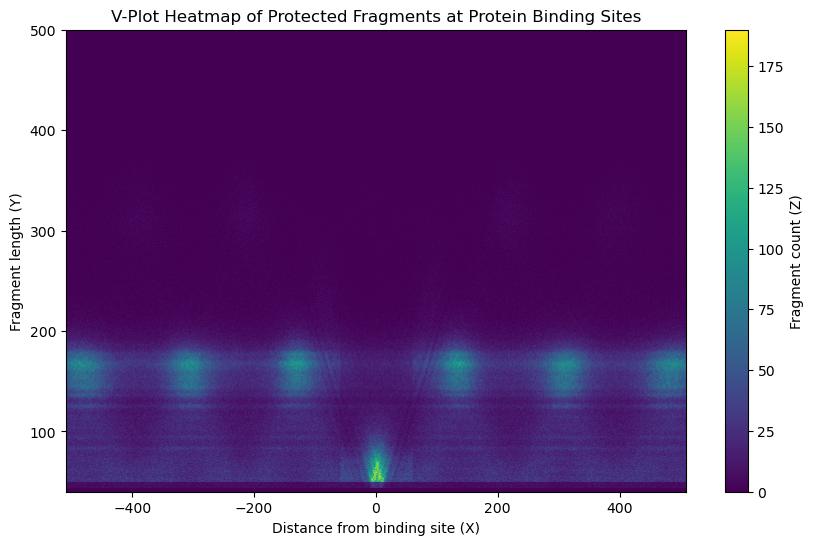

In [2]:
# 1) Count how many fragments of each size Y occur at each offset X
count_dict = defaultdict(int)
with open('mapped.bed') as f:
    for line in f:
        cols = line.strip().split('\t')
        # compute centers
        c1 = (int(cols[2]) + int(cols[3])) // 2
        c2 = (int(cols[8]) + int(cols[9])) // 2
        x  = c2 - c1
        # fragment size
        y  = int(cols[9]) - int(cols[8])
        count_dict[(x, y)] += 1

# 2) Prepare axes: sorted unique X and Y values
x_unique = sorted({x for (x, y) in count_dict})
y_unique = sorted({y for (x, y) in count_dict})
xi = {x: i for i, x in enumerate(x_unique)}
yi = {y: i for i, y in enumerate(y_unique)}

# 3) Build the heatmap array Z[Y_index, X_index]
heatmap = np.zeros((len(y_unique), len(x_unique)), dtype=int)
for (x, y), z in count_dict.items():
    heatmap[yi[y], xi[x]] = z

# 4) Plot the V-Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(
    heatmap,
    aspect='auto',
    cmap='viridis',
    origin='lower',
    extent=[x_unique[0], x_unique[-1], y_unique[0], y_unique[-1]]
)
plt.title('V-Plot Heatmap of Protected Fragments at Protein Binding Sites')
plt.colorbar(label='Fragment count (Z)')
plt.xlabel('Distance from binding site (X)')
plt.ylabel('Fragment length (Y)')
plt.show()

### Interpretation from the V plot

1. **Fragment Length vs. Distance Relationship:**
   - **a)** Far from binding site (x-axis extremes): Only long fragments (large y-values: 200-400bp) can span the distance to reach the binding site, forming the upper arms of the V.
   - **b)** Near binding site (center): Short fragments (50-100bp) can still overlap the site, forming the bottom tip of the V.

2. **Minimum Fragment Length:**
   The tip of the V (minimum y at x=0) reveals the smallest protected fragment size.

3. **Bilateral Symmetry:**
   The V-shape is symmetrical around x=0 (binding site). Both left (negative x) and right (positive x) sides show similar patterns. This indicates the protein protects DNA equally in both directions.

4. **Strong Central Protection:**
   The apex of the V-shape at x=0 indicates the precise protein binding site. The darkest heatmap colors at the center show the highest concentration of protected fragments. This suggests tight binding that strongly protects DNA from nuclease digestion.
